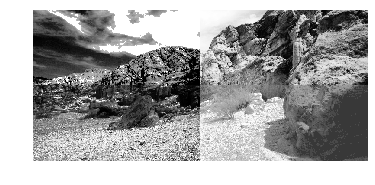

In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import cv2
def histEqualization(img):
    img = np.array(img)
#     img = np.array(img)
    img_flat = img.flatten()
    # plt.hist(img_flat, bins=50)
    # print()
    # print(img_flat)

    histogram = np.zeros(256)
    for pixel in img_flat:
        histogram[pixel] += 1
    for i in range(1,256):
    #     print(i)
        histogram[i] += histogram[i-1]
    histogram = (((histogram-np.min(histogram))/(np.max(histogram)-np.min(histogram))) *255).astype('uint8') 
#     r, c = img.shape
    # prin
    # histogram = np.floor((histogram/r*c)*255)
    img_new_flat = histogram[img_flat]
    # plt.hist(img_new, bins=50)
    img_new = np.reshape(img_new_flat, img.shape)
    return img_new

img1 = Image.open('../input/part1.png').convert('L')
img2 = Image.open('../input/part2.png').convert('L')
img3 = Image.open('../input/part3.png').convert('L')
img4 = Image.open('../input/part4.png').convert('L')
img1 = np.array(img1)
img2 = np.array(img2)
img3 = np.array(img3)
img4 = np.array(img4)

shape = min(img1.shape, img2.shape)
shape = min(shape, img3.shape)
shape = min(shape, img4.shape)
# print(shape)


# img = np.zeros(shape = (4, shape[0], shape[1]))
img1 = img1[:shape[0], :shape[1]]
img2 = img2[:shape[0], :shape[1]]
img3 = img3[:shape[0], :shape[1]]
img4 = img4[:shape[0], :shape[1]]
# print(img.shape)
img_eq1 = np.zeros(shape=(2, shape[0], shape[1]))
img_eq2 = np.zeros(shape=(2, shape[0], shape[1]))
img_eq1[0] = histEqualization(img1)
img_eq1[1] = histEqualization(img2)
img_eq2[0] = histEqualization(img3)
img_eq2[1] = histEqualization(img4)


new_img1 = []
new_img1 = np.hstack( (img_eq1[0], img_eq1[1] ))
new_img2 = []
new_img2 = np.hstack( (img_eq2[0], img_eq2[1] ))
ans = np.vstack((new_img1, new_img2))
plt.imshow(ans, cmap='gray');plt.axis('off')
# new_img = Image.fromarray(new_img)
plt.show()
